In [1]:
# Imports

In [2]:
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

# for medoids
# from sklearn_extra.cluster import KMedoids # no way to install
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import read_sample
from pyclustering.cluster import cluster_visualizer
from sklearn_extra.cluster import KMedoids
import time

%matplotlib inline

In [3]:
# Set constants
k = 2
colors = ['green', 'blue', 'orange', 'red', 'purple', 'yellow', 'cyan', 'black', 'pink', 'sky']

In [4]:
df = pd.read_csv('rawdata200K.dat', delim_whitespace=True)
df.columns = ["X", "Y"]
df.isnull().sum()

X    0
Y    0
dtype: int64

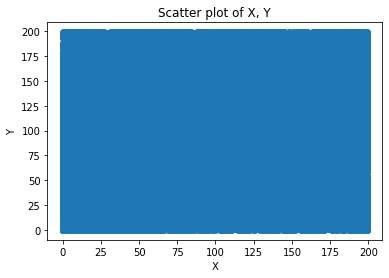

In [5]:
plt.scatter(df.X, df.Y)
plt.title('Scatter plot of X, Y')
plt.xlabel('X')
plt.ylabel('Y')

plt.savefig('images/scatter-plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
# Find kMeans
# For capturing the execution time 
k_means = KMeans(n_clusters=k)
cluster = k_means.fit_predict(df[['X', 'Y']])
df['cluster'] = cluster

In [7]:
# Visualize cluster
dfs = []
for i in range(0,k):
    dfs.append(df[df.cluster==i])

In [8]:
# Plot it
    
/
"""
for i in range(0,k):
    plt.scatter(dfs[i].X, dfs[i].Y, color=colors[i], marker='*', label='cluster ' + str(i))

plt.title('Scatter plot of X, Y using K Means with K=' + str(k))
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()


plt.savefig('images/scatter-plot-kmeans-k-'+str(k)+'.png', dpi=300, bbox_inches='tight')
plt.show()
"""
/

()

In [9]:
# Scale data
scaler = MinMaxScaler()
df.X = scaler.fit(df[['X']]).transform(df[['X']])
df.Y = scaler.fit(df[['Y']]).transform(df[['Y']])

In [10]:
# Retrain or recompute cluster
start = time.time()
cluster = k_means.fit_predict(df[['X', 'Y']])
df['cluster'] = cluster
end = time.time()
print(end-start)

1.4243109226226807


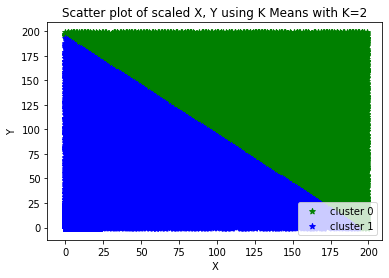

In [11]:
# Plot it
for i in range(0,k):
    plt.scatter(dfs[i].X, dfs[i].Y, color=colors[i], marker='*', label='cluster ' + str(i))
    
plt.title('Scatter plot of scaled X, Y using K Means with K='+str(k))
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.savefig('images/scatter-plot-kmeans-scaled-k-'+str(k)+'.png', dpi=300, bbox_inches='tight')
plt.show()


In [12]:
# Elbow plot method - find best k value
# For capturing the execution time 
start = time.time()
k_list = range(1, 10)
sse = []

for k_i in k_list:
    k_means = KMeans(n_clusters=k_i)
    k_means.fit(df[['X', 'Y']])
    sse.append(k_means.inertia_)
    
end= time.time()
print(end - start)

24.44645118713379


In [13]:
sse

[34924.362078203754,
 12365.064886474058,
 7533.189682911524,
 5669.9820230651185,
 4300.324851775172,
 3310.6612565612886,
 2560.749403853674,
 1846.4609788417924,
 1632.8876164826816]

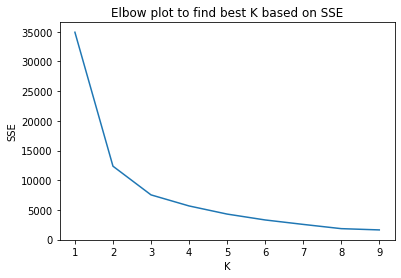

In [14]:
plt.title('Elbow plot to find best K based on SSE')

plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_list, sse)

plt.savefig('images/elbow-kmeans-scaled.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# K Medoids from pyclustering
start = time.time()

sample = df.values.tolist() # read_sample('./rawdata10K.dat')

# find clusteroids
clusteroids = []
for i in range(0,k):
    clusteroids.append(i)
    
    
k_medoids_instance = kmedoids(sample, clusteroids)
k_medoids_instance.process()
clusters = k_medoids_instance.get_clusters()
medoids = k_medoids_instance.get_medoids()
end = time.time()

print(end-start)

print(medoids)


In [ ]:
# Display clusters.
visualizer = cluster_visualizer()
visualizer.set_canvas_title('KMedoids clustering with K='+str(k))
visualizer.append_clusters(clusters, sample)
visualizer.show()

#visualizer.show(display = True)
#plt.show()
#plt.savefig('images/scatter-plot-kmedoids-scaled-k-'+str(k)+'.png', dpi=300, bbox_inches='tight')


In [ ]:
# Visualize medoids using plot

dfs = []
for i in range(0,k):
    dfs.append(df[df.index.isin(clusters[i])])

In [ ]:
# Plot it
for i in range(0,k):
    plt.scatter(dfs[i].X, dfs[i].Y, color=colors[i], marker='*', label='cluster ' + str(i))
    
plt.title('Scatter plot of scaled X, Y using K Medoids with K='+str(k))
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.savefig('images/scatter-plot-kmedoids-scaled-k-'+str(k)+'.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Using kmedoids from sklearn-extra
/
"""
xx = df[['X', 'Y']].values.tolist()
kmedoids = KMedoids(n_clusters=3, random_state=0).fit(xx)
df['cluster'] = kmedoids.labels_

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster ==2]

plt.scatter(df1.X, df1.Y, color='blue', marker='*', label='cluster 1')
plt.scatter(df2.X, df2.Y, color='orange', marker='+', label='cluster 2')
plt.scatter(df3.X, df3.Y, color='green', marker='o', label='cluster 3')
plt.title('Scatter plot of scaled X, Y using K Medoids - lib : sklearn-extra')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
"""
/